## Locally Weighted Regression
1) Read and Normalise the Dataset

2) Generate W for every query point

3) No training is involved , directly make predictions using closed form solution we derived
`(X'WX)inv * X'WY` where X' is Transpose

4) Find the best value of Tau (Bandwidth Parameter) [Cross Validation]

### 1. Loading Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
dfx = pd.read_csv("weightedX.csv")
dfy = pd.read_csv("weightedY.csv")

In [4]:
X = dfx.values
Y = dfy.values

In [5]:
print(X.shape)
print(Y.shape)

(99, 1)
(99, 1)


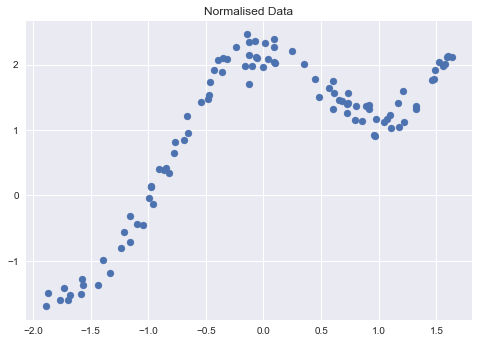

In [7]:
# Normalise the data
X = (X-X.mean())/X.std()

plt.style.use("seaborn")
plt.title("Normalised Data")
plt.scatter(X,Y)
plt.show()

### 2. Find out W (m*m) diagonal matrix

In [8]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [9]:
print(type(np.eye(5)))
# a*b ==> a,b --> matrices --> Matrix Multiplication
print(type(np.mat(np.eye(5))))
# a*b ==> a,b --> arrays --> Element wise

<class 'numpy.ndarray'>
<class 'numpy.matrix'>


In [10]:
def getW(query_point,X,tau):
    m = X.shape[0]
    W = np.mat(np.eye(m))
    
    for i in range(m):
        W[i,i] = np.exp(np.dot((X[i]-query_point),(X[i]-query_point).T)/(-2*tau*tau))
        
    return W

In [11]:
X = np.mat(X)
Y = np.mat(Y)
m = X.shape[0]

W = getW(-1,X,1)
print(W)

[[0.81327022 0.         0.         ... 0.         0.         0.        ]
 [0.         0.98353311 0.         ... 0.         0.         0.        ]
 [0.         0.         0.81193405 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.59936711 0.         0.        ]
 [0.         0.         0.         ... 0.         0.2758226  0.        ]
 [0.         0.         0.         ... 0.         0.         0.08496804]]


### 3. Make Predictions

In [12]:
def predict(X,Y,query_x,tau):
    ones = np.ones((m,1))
    X_ = np.hstack((X,ones))
    
    qx = np.mat([query_x,1])
    
    W = getW(qx,X_,tau)
    
    #theta = `(X′WX)inv * X′WY`
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    #print(theta.shape)
    pred = np.dot(qx,theta)
    return theta,pred

In [13]:
theta,pred = predict(X,Y,1.0,1.0)

In [14]:
print(theta)

[[0.14069504]
 [1.45348191]]


In [15]:
print(pred)

[[1.59417694]]


### 4. Visualise Predictions, Analyse the Effect of Tau

In [16]:
def plotPrediction(tau):
    X_test = np.linspace(-2,2,20)
    Y_test = []
    
    for xq in X_test:
        theta,pred = predict(X,Y,xq,tau)
        Y_test.append(pred[0][0])
        
    Y_test = np.array(Y_test)
    
    XO = np.array(X)
    YO = np.array(Y)
    
    plt.title("Tau/Bandwidth Param %.2f"%tau)
    plt.scatter(XO,YO)
    plt.scatter(X_test,Y_test,color='red')
    plt.show()

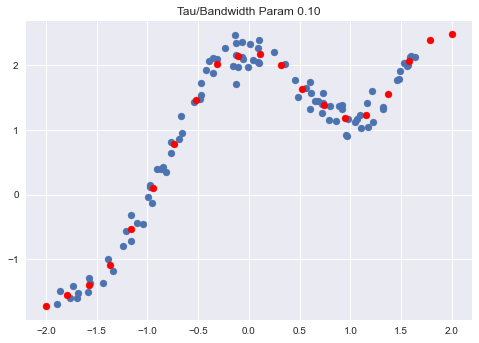

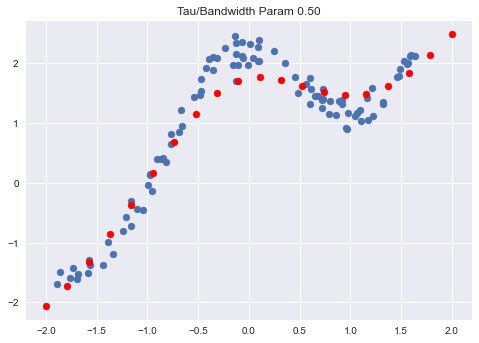

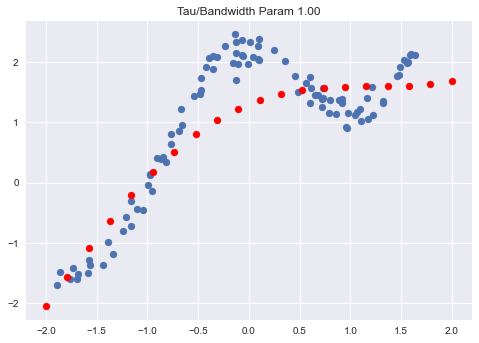

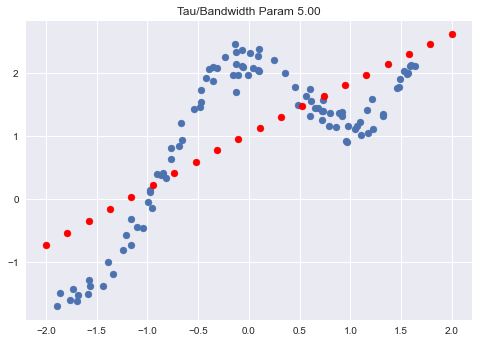

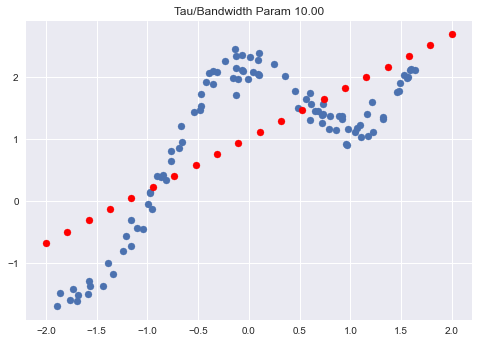

In [17]:
taus = [0.1,0.5,1,5,10]
for t in taus:
    plotPrediction(t)